## The String Module

Python’s string module is a convenient one-stop-shop for string constants that fall in ASCII’s character set.

Here’s the core of the module in all its glory:

In [ ]:
# From lib/python3.7/string.py

whitespace = ' \t\n\r\v\f'
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'
ascii_uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
ascii_letters = ascii_lowercase + ascii_uppercase
digits = '0123456789'
hexdigits = digits + 'abcdef' + 'ABCDEF'
octdigits = '01234567'
punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
printable = digits + ascii_letters + punctuation + whitespace


In [1]:
import string

s = "What's wrong with ASCII?!?!?"
s.rstrip(string.punctuation)
print(s)

What's wrong with ASCII?!?!?


In [11]:
def make_bitseq(s: str) -> str:
    if not s.isascii():
        raise ValueError("ASCII only allowed")
    return " ".join(f"{ord(i):08b}" for i in s)

make_bitseq("bits")


make_bitseq("CAPS")


make_bitseq("$25.43")


make_bitseq("~5")

print(make_bitseq("bits"))


01100010 01101001 01110100 01110011


There’s a critically important formula that’s related to the definition of a bit. Given a number of bits, n, the number of distinct possible values that can be represented in n bits is 2n:

In [9]:
from math import ceil, log

def n_bits_required(nvalues: int) -> int:
    return ceil(log(nvalues) / log(2))

def n_possible_values(nbits: int) -> int:
    return 2 ** nbits

print(n_possible_values(16))
print(f"number of bits required for 256 is  {n_bits_required(256)}")


65536
number of bits required for 256 is  8


In [14]:
int('11')

int('11', base=10)  # 10 is already default

int('11', base=2)  # Binary

int('11', base=8)  # Octal

print(int('11', base=16))  # Hex


17


In [15]:
11

0b11  # Binary literal

0o11  # Octal literal

0x11  # Hex literal

17

## Encoding and decoding in Python

Unicode fundamentally serves the same purpose as ASCII, but it just encompasses a way, way, way bigger set of code points. There are a handful of encodings that emerged chronologically between ASCII and Unicode, but they are not really worth mentioning just yet because Unicode and one of its encoding schemes, UTF-8, has become so predominantly used.

UTF-8 as well as its lesser-used cousins, UTF-16 and UTF-32, are encoding formats for representing Unicode characters as binary data of one or more bytes per character.  A crucial feature is that UTF-8 is a variable-length encoding. 

<ul>
<li>
Python 3 source code is assumed to be UTF-8 by default. This means that you don’t need # -*- coding: UTF-8 -*- at the top of .py files in Python 3.
<li>
All text (str) is Unicode by default. Encoded Unicode text is represented as binary data (bytes). The str type can contain any literal Unicode character, such as "Δv / Δt", all of which will be stored as Unicode.
<li>
Python 3 accepts many Unicode code points in identifiers, meaning résumé = "~/Documents/resume.pdf" is valid if this strikes your fancy.
<li>
Python’s re module defaults to the re.UNICODE flag rather than re.ASCII. This means, for instance, that r"\w" matches Unicode word characters, not just ASCII letters.
<li>
The default encoding in str.encode() and bytes.decode() is UTF-8.
</ul>


Python 3’s <b>str</b> type is meant to represent human-readable text and can contain any Unicode character.

The bytes type, conversely, represents binary data, or sequences of raw bytes, that do not intrinsically have an encoding attached to it.

Encoding and decoding is the process of going from one to the other.  In .encode() and .decode(), the encoding parameter is "utf-8" by default, though it’s generally safer and more unambiguous to specify it.

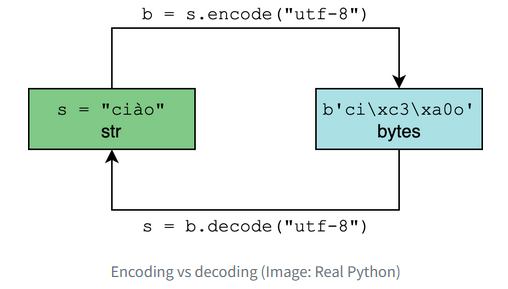

In [29]:
# ALT-0-224 for the à character
print("ciào".encode())  #utf-8 is default

print(b'ci\xc3\xa0o'.decode())


b'ci\xc3\xa0o'
ciào
